In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 3]
plt.rcParams['figure.dpi'] = 100
plt.style.use('seaborn-notebook')

# Sistemas de EDOs - PVI

Nesta seção vamos ver como resolver um sistema de equações diferenciais ordinárias onde são fornecidas as condições em um mesmo instante (PVI).

Suponha que tenhamos um sistema de equações diferenciais que desejamos resolver, do tipo:

\begin{equation} 
\begin{array}{c}
\dfrac{dy_1}{dt} = f_1(t, y_1, y_2, \ldots, y_n) \\
\dfrac{dy_2}{dt} = f_2(t, y_1, y_2, \ldots, y_n) \\
\vdots \\
\dfrac{dy_n}{dt} = f_n(t, y_1, y_2, \ldots, y_n) 
\end{array}
\end{equation}

onde:

* Cada equação diferencial é de primeira ordem.
* Do lado esquerdo das equações aparece apenas o termo com a derivada

## Exemplo

https://www.dm.ufscar.br/profs/waldeck/sourceforge/pngtest.php

Resolva o sistema de equações diferenciais:

$
\left\{
\begin{array}{ccccc}
x_1'(t) & = & -\dfrac{8}{5}x_1(t) &+& \dfrac{3}{10}x_2(t) \\
x_2'(t) & = & \dfrac{8}{5}x_1(t) &-& \dfrac{4}{5}x_2(t) 
\end{array}
\right.
$

com as seguintes condições iniciais:

$
\begin{array}{ll}
x_1(0) = 0 \\
x_2(0) = 12
\end{array}
$

### Solução utilizando SYMPY

In [40]:
import sympy as sym
from sympy.solvers.ode.systems import dsolve_system
sym.init_printing()
t = sym.symbols('t')
x1 = sym.Function('x1') # função x1(t)
x2 = sym.Function('x2') # função x2(t)
dx1dt = sym.Derivative(x1(t),t) # derivada de x1
dx2dt = sym.Derivative(x2(t),t) # derivada de x2
eq1 = sym.Eq(dx1dt , -8/5*x1(t) + 3/10*x2(t)) # primeira equação
eq2 = sym.Eq(dx2dt, 8/5*x1(t) - 4/5*x2(t)) # segunda equação
edo = [eq1, eq2] # sistema de equações diferenciais
cond_iniciais = {x1(0):0, x2(0): 12} # condições iniciais
sol = dsolve_system(edo, ics=cond_iniciais) # resolvendo o sistema de eq. dif.
display(sol)

In [41]:
sol[0]

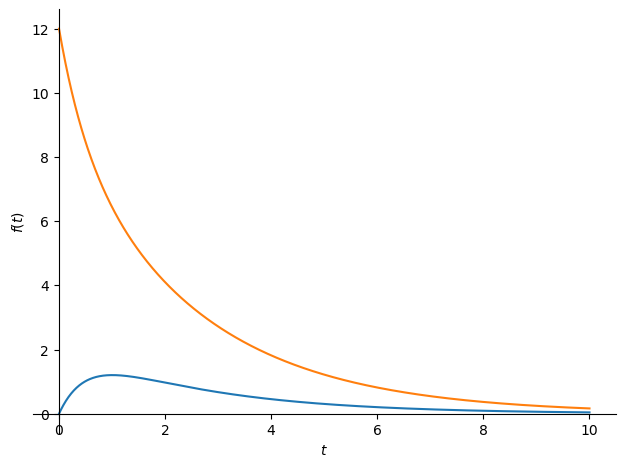

In [24]:
from sympy.plotting import plot
plot(sol[0][0].rhs, sol[0][1].rhs, (t,0,10))

### Solução utilizando SCIPY

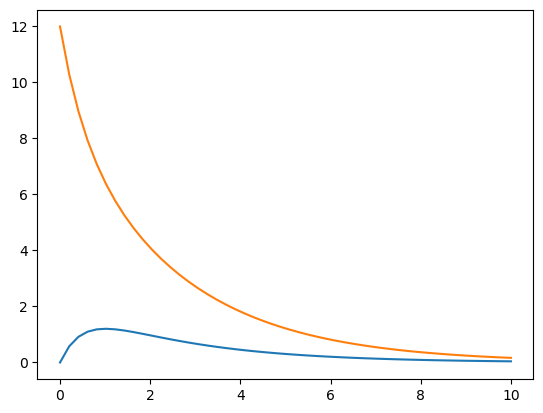

In [36]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def edo(t, X):
    x1,x2 = (X[0], X[1])
    dx1dt = -8/5*x1 + 3/10*x2 
    dx2dt = 8/5*x1 - 4/5*x2
    return [ dx1dt , dx2dt ]

# definindo a condição inicial (PVI)
x0 = [0 , 12]
t = np.linspace(0,10)

# chamando o método numérico que calcula a solução da EDO
sol = solve_ivp( edo, y0 = x0, t_span = [0, 10], t_eval = t)
x1 = sol.y[0]
x2 = sol.y[1]
plt.plot(t, x1, t, x2)

## Exercício

Resolva o seguinte sistema de equações diferenciais:

$
\left\{
\begin{array}{ll}
\dfrac{dx_1}{dt} & = x_2 \\
\dfrac{dx_2}{dt} & = -10x_1 - 5x_2 + \sin(t)
\end{array}
\right.
$

com as condições iniciais:

* $x_1(0) = 0$
* $x_2(0) = 5$

Plote o gráfico de $x_1$ no intervalo $(0,30)$

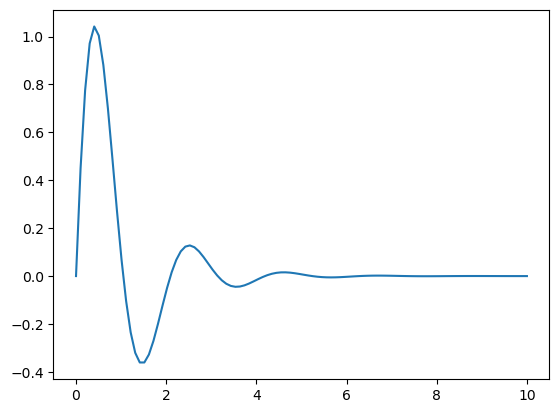

In [84]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def edo(t, X):
    x1,x2 = (X[0], X[1])
    dx1dt = x2
    dx2dt = -10*x1 - 2*x2 # + np.sin(t)
    return [dx1dt, dx2dt]

cond_iniciais = [0, 5]
t = np.linspace(0,10,100)
sol = solve_ivp(edo, y0=cond_iniciais, t_span=(0,10), t_eval=t)
plt.plot(t,sol.y[0])

## Exemplo: Predador-presa

https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html



Simula o modelo predador presa, dado pelas equações abaixo:

\begin{equation}
\dfrac{dx}{dt} = x(\alpha - \beta y)
\end{equation}

\begin{equation}
\dfrac{dy}{dt} = y(\delta x - \gamma)
\end{equation}

para $\alpha = 1$, $\beta = 0.1$, $\delta = 0.075$ e $\gamma = 1.5$

In [1]:
# definindo a função de Lotka-Volterra (predador-presa)
# dx/dt = x(a - by)
# dy/dt = y(dx - c)
def predadorpresa(t, Y):
    a = 1.0
    b = 0.1
    d = 0.075
    g = 1.5
    x = Y[0]
    y = Y[1]
    dy_dt = [ x*(a - b*y) , y*(d*x - g) ]
    return dy_dt

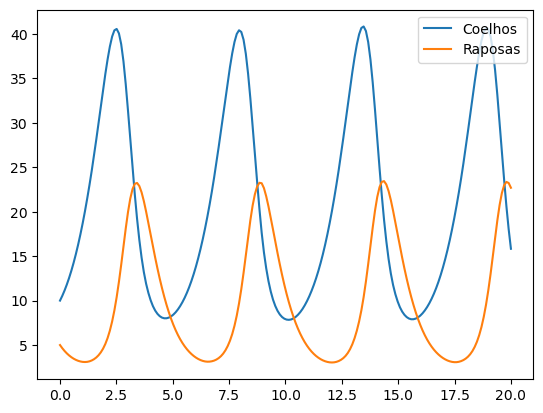

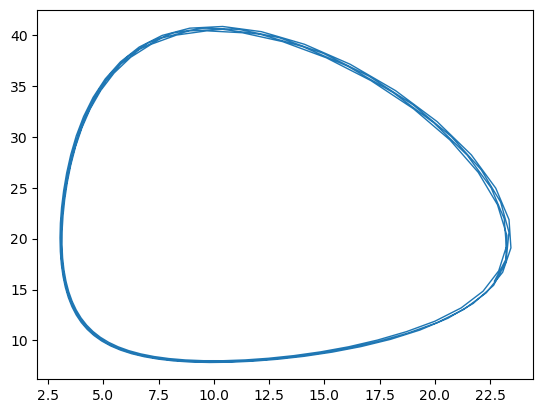

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# definindo os instantes que serão utilizados no cálculo 
tinicial = 0
tfinal = 20
t = np.linspace(tinicial , tfinal, 200)

# definindo a condição inicial (PVI)
y0 = [10 , 5]

# chamando o método numérico que calcula a solução da EDO
sol = solve_ivp( predadorpresa, y0 = y0, t_span = [tinicial, tfinal],  t_eval = t)
presa = sol.y[0]
predador = sol.y[1]

# exibindo o gráfico da resposta
plt.plot(t, presa, t, predador)
plt.legend(['Coelhos', 'Raposas'])

plt.figure()
plt.plot(predador, presa, lw=1)

## Transformando uma EDO de ordem superior em um sistema de EDO's

Vimos que a função `dsolve` resolve uma EDO de 1ª ordem com o seguinte formato:

$\dfrac{dx}{dt} = f(t,x)$.

Porém, o que devemos fazer caso a EDO seja de ordem superior, com
por exemplo:

$\dfrac{d^2x}{dt^2} = f(t,x,\frac{dx}{dt})$.

Nestes casos, é possível converter uma EDO de ordem $n$ em um sistema com $n$ equações de 1ª ordem:

$
\left\{
\begin{array}{ll}
\dfrac{dx_1}{dt} & = x_2 \\
\dfrac{dx_2}{dt} & = x_3 \\
& \vdots \\
\dfrac{dx_n}{dt} & = f(t,x_1, x_2, \ldots, x_{n})
\end{array}
\right.
$

## Exemplo: Queda livre

Vamos supor que desejamos conhecer tanto a velocidade quanto a posição do corpo rígido no problema anterior.
O problema pode ser formulado através de 2 equações diferenciais:

$
\begin{array}{l}
\dfrac{dx}{dt} = v \\
\dfrac{dv}{dt} = g - \dfrac{c_d}{m}v^2
\end{array}
$

Supondo que as condições iniciais são $x(0) = 0$ e $v(0) = 0$ então temos um PVI com um sistema de equações diferenciais.

Vamos criar um vetor $y = [x, v]$ contendo as duas variáveis que desejamos descobrir ($y_1 = x$ e $y_2 = v$).
Assim, o sistema pode ser escrito conforme o formato descrito em \ref{eq:sode}:

$
\begin{array}{l}
\dfrac{dy_1}{dt} = y_2 \\
\dfrac{dy_2}{dt} = g - \dfrac{c_d}{m}y_2^2
\end{array}
$


### Solução numérica

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def quedalivre_sistema_edo(t, y):
    g = 9.81
    cd = 0.25
    m = 68.1
    y1dot[0] = y[1]
    y2dot[1] = g - cd/m * y[1]**2
    return [y1dot, y2dot]

Text(42.597222222222214, 0.5, 'Velocidade')

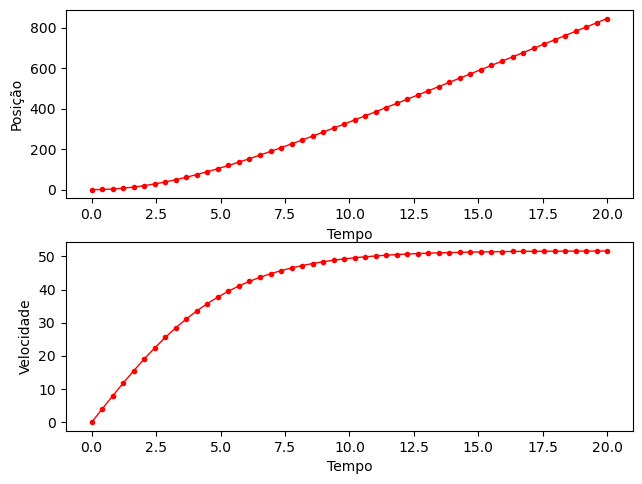

In [4]:
t = np.linspace(0,20) # instantes usados no calculo
y0 = [0, 0] # condicao inicial

res = solve_ivp( quedalivre_sistema_edo, y0 = y0, t_span = [0,20], t_eval = t) # resolucao do PVI

#print(res)
x = res.y[0]
v = res.y[1]

f, (ax1, ax2) = plt.subplots(2,1)
f.tight_layout()
ax1.plot(t, x, '.-r', lw=1)
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Posição')
ax2.plot(t, v, '.-r', lw=1)
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Velocidade')

### Solução analítica

Vimos anteriormente que a solução analítica para a velocidade é dada por:

$
v(t) = \sqrt{\dfrac{gm}{c_d}} \cdot \tanh \left(\sqrt{\dfrac{gc_d}{m}} \cdot t \right)
$

Substituindo este valor na equação $\frac{dx}{dt} = v$ e resolvendo-a, obtemos a forma analítica para a posição:

$
x(t) = \dfrac{m}{c_d}\ln \left[\cosh \left(\sqrt{\dfrac{gc_d}{m}} \cdot t \right) \right]
$


Somatória dos erros ao quadrado [VELOCIDADE = 0.0020100723314275927 ] [POSIÇÃO = 0.1360523059698433 ]


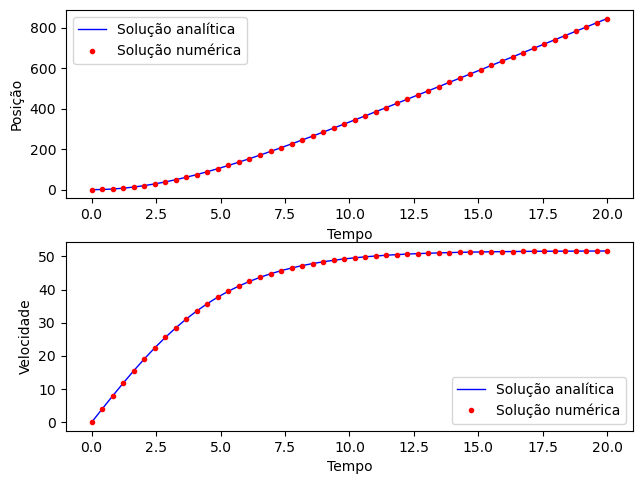

In [5]:
def quedalivre2_analitico(t):
    g = 9.81
    cd = 0.25
    m = 68.1
    v = np.sqrt(g*m/cd)*np.tanh(np.sqrt(g*cd/m)*t)
    x = m/cd*np.log(np.cosh(np.sqrt(g*cd/m)*t))
    return v,x

treal = np.linspace(0, 20)
(vreal, xreal) = quedalivre2_analitico(t)
# podemos comparar a solucao numerica obtida anteriormente com a solucao analitica:

f, (ax1, ax2) = plt.subplots(2,1)
f.tight_layout()
ax1.plot(treal, xreal, '-b', t, x, '.r', lw=1)
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Posição')
ax1.legend(['Solução analítica', 'Solução numérica'])
ax2.plot(treal, vreal, '-b', t, v, '.r', lw=1)
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Velocidade')
ax2.legend(['Solução analítica', 'Solução numérica'])

erro1 = np.sum((vreal - v)**2)
erro2 = np.sum((xreal - x)**2)
print('Somatória dos erros ao quadrado [VELOCIDADE =', erro1, '] [POSIÇÃO =', erro2, ']')

# Exemplo

http://sections.maa.org/okar/papers/2010/israel.pdf

Considere que a função $R(t)$ modela os sentimentos de Romeu por Julieta e a função $J(t)$ modela os sentimentos de Julieta por Romeu.

Onde valores negativos representam aversão e valores positivos afeição. 

Considere o seguinte sistema de equações diferenciais:

$
\begin{array}{ll}
R'(t) &= rrR(t) + rj J(t) \\
J'(t) &= jrR(t) + jj J(t) \\
\end{array}
$

onde $rr$, $rj$, $jr$ e $jj$ são constantes.

Simule os sentimentos de Romeu e Julieta para os seguintes valores:

* $rr = -0.12$
* $rj = 1$
* $jr = -1$
* $jj = -0.18$

e

* $rr = -0.12$
* $rj = 1$
* $jr = -1$
* $jj = 0.18$